<a href="https://colab.research.google.com/github/jpoliveira08/mmd-qualidade-energia/blob/main/mmd_qualidade_energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montando o drive com os arquivos csv
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Definindo a localização do arquivo csv após o upload no drive
empreendimentos_csv_path = '/content/drive/MyDrive/geracao/empreendimentos_gd.csv'

# Definindo as colunas que serão buscadas, pois desta maneira tem-se uma melhor performance
empreendimentos_colunas = [
    'MdaPotenciaInstaladaKW',
    'DthAtualizaCadastralEmpreend',
    'SigAgente',
    'SigUF'
]

# Definindo as colunas no formato de data para o python converter para date
empreendimentos_colunas_datas = ['DthAtualizaCadastralEmpreend']

empreendimentos_df = pd.read_csv(
    empreendimentos_csv_path, # Caminho do arquivo csv
    usecols = empreendimentos_colunas, # Colunas a serem lidas no csv
    sep = ';', # Qual o tipo de separador utilizado no csv
    encoding = 'unicode_escape', # Resolvendo invalid continuation byte
    decimal = ',', # Qual o tipo de separador de decimal o arquivo possui
    parse_dates = empreendimentos_colunas_datas # Quais colunas serão transformadas em data
)

In [ ]:
indicadores_qualidade_csv_path = '/content/drive/MyDrive/geracao/indicadores_qualidade.csv'

indicadores_colunas = [
    'SigAgente',
    'SigIndicador',
    'AnoIndice',
    'NumPeriodoIndice',
    'VlrIndiceEnviado'
]

indicadores_df = pd.read_csv(
    indicadores_qualidade_csv_path,
    usecols = indicadores_colunas,
    sep = ',',
    decimal = ',',
)

In [ ]:
# Realizando o agrupamento de dados, somando a potência anual
potencia_por_ano = empreendimentos_df.groupby(
    empreendimentos_df.DthAtualizaCadastralEmpreend.dt.year, as_index=False
)['MdaPotenciaInstaladaKW'].sum()

# Realizando a soma acumulada de potência no decorrer dos anos
potencia_acumulada_por_ano = potencia_por_ano.cumsum()

In [ ]:
# Realizando o agrupamento de indicadores por ano e a contagem da quantidade de ocorrências por ano
quantidade_problemas_por_ano_considerando_zeros = indicadores_df.groupby(indicadores_df.AnoIndice, as_index=False)['VlrIndiceEnviado'].count()
quantidade_problemas_por_ano_considerando_zeros = quantidade_problemas_por_ano_considerando_zeros[['VlrIndiceEnviado']]

In [ ]:
# Realizando o agrupamento de indicadores por ano, mas considerando na contagem somente os indicadores que possuíram valores acima de 0
quantidade_problemas_por_ano = indicadores_df[indicadores_df['VlrIndiceEnviado'] != 0].groupby(indicadores_df.AnoIndice, as_index=False)['VlrIndiceEnviado'].count()

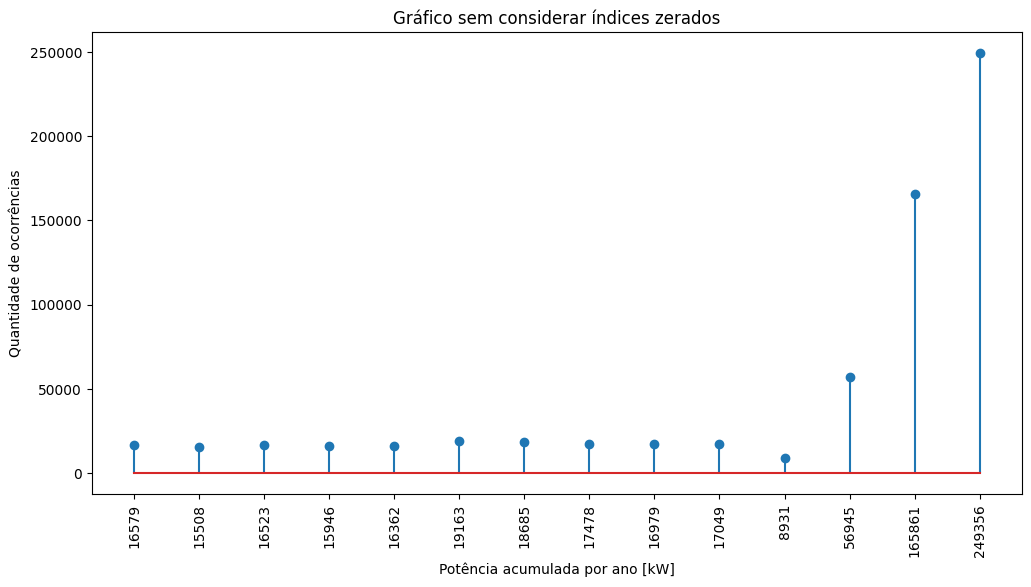

In [ ]:
potencia_acumulada_por_ano_tratado = potencia_acumulada_por_ano.tail(-1)

toplot_potencia_acumulada_por_ano = []
for index, row in potencia_acumulada_por_ano_tratado.iterrows():
  toplot_potencia_acumulada_por_ano.append(round(row.MdaPotenciaInstaladaKW, 2))

toplot_quantidade_problemas_por_ano = []
for index, row in quantidade_problemas_por_ano.iterrows():
  toplot_quantidade_problemas_por_ano.append(row.VlrIndiceEnviado)

anos = np.arange(2010, 2024, step = 1)

plt.figure(figsize = ((12, 6)))

plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
ticks, labels = plt.xticks()
plt.xticks(ticks, toplot_quantidade_problemas_por_ano, rotation = 'vertical')
plt.title('Gráfico sem considerar índices zerados')
plt.xlabel("Potência acumulada por ano [kW]")
plt.ylabel("Quantidade de ocorrências")
plt.stem(anos, toplot_quantidade_problemas_por_ano)

plt.show()

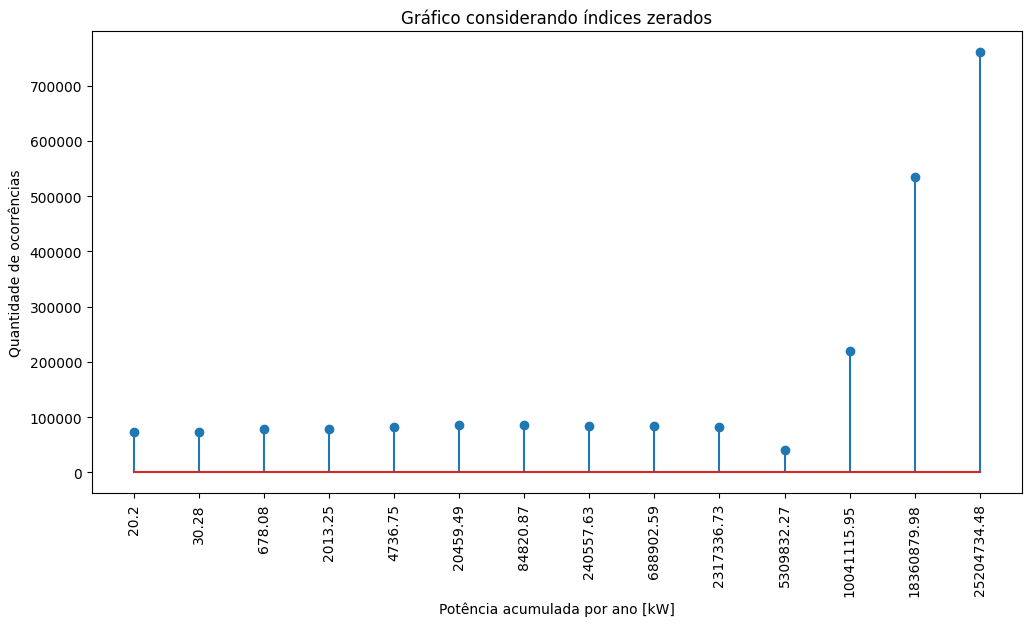

In [ ]:
toplot_quantidade_problemas_por_ano_considerando_zeros = []
for index, row in quantidade_problemas_por_ano_considerando_zeros.iterrows():
  toplot_quantidade_problemas_por_ano_considerando_zeros.append(row.VlrIndiceEnviado)

plt.figure(figsize = ((12, 6)))
plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
ticks, labels = plt.xticks()
plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
plt.title('Gráfico considerando índices zerados')
plt.xlabel("Potência acumulada por ano [kW]")
plt.ylabel("Quantidade de ocorrências")
plt.stem(anos, toplot_quantidade_problemas_por_ano_considerando_zeros)
plt.show()

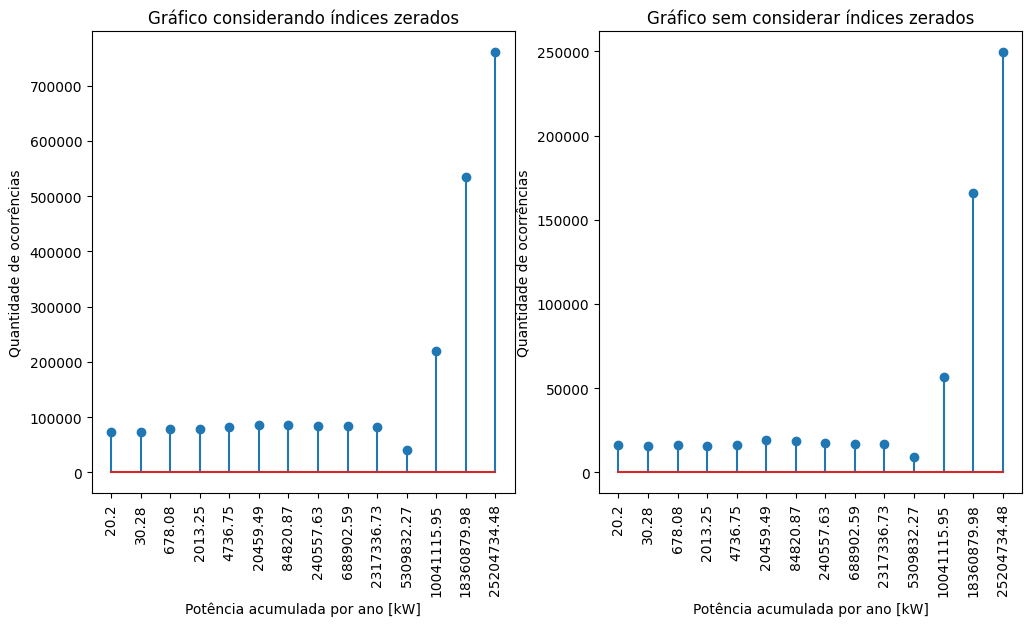

In [ ]:
plt.figure(figsize = ((12, 6)))

plt.subplot(1, 2, 1)
plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
ticks, labels = plt.xticks()
plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
plt.title('Gráfico considerando índices zerados')
plt.xlabel("Potência acumulada por ano [kW]")
plt.ylabel("Quantidade de ocorrências")
plt.stem(anos, toplot_quantidade_problemas_por_ano_considerando_zeros)

plt.subplot(1, 2, 2)
plt.stem(anos, toplot_quantidade_problemas_por_ano)
plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
ticks, labels = plt.xticks()
plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
plt.title('Gráfico sem considerar índices zerados')
plt.xlabel("Potência acumulada por ano [kW]")
plt.ylabel("Quantidade de ocorrências")
plt.show()

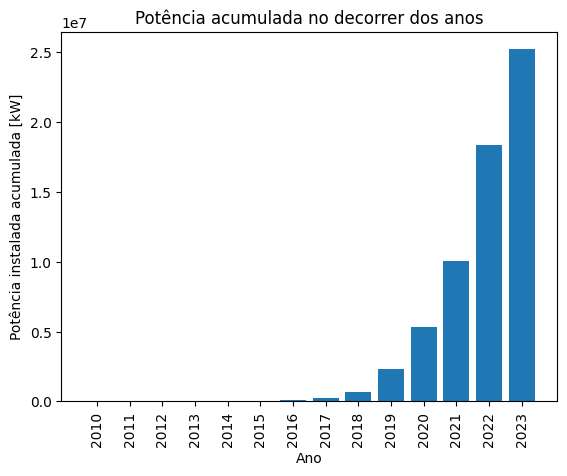

In [ ]:
# Potência instalada acumulada no decorrer dos anos.

potencia_semestral = empreendimentos_df.groupby(
    empreendimentos_df.DthAtualizaCadastralEmpreend.dt.year, as_index=False
    )['MdaPotenciaInstaladaKW'].sum()
potencia_acumulada_por_ano = potencia_por_ano.cumsum()

plt.bar(anos, toplot_potencia_acumulada_por_ano)
plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
plt.title('Potência acumulada no decorrer dos anos')
plt.xlabel("Ano")
plt.ylabel("Potência instalada acumulada [kW]")
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# Tratamento considerando valores de ocorrência que foram retornados zerados pelo serviço
quantidade_problemas_por_indicador_ano_considerando_zeros = indicadores_df.groupby([indicadores_df.SigIndicador, indicadores_df.AnoIndice], as_index=False)['VlrIndiceEnviado'].count()

quantidade_indicador_considerando_zeros_DRPt_tratado = {} # Duração Relativa da Transgressão Máxima de Tensão Precária
quantidade_indicador_considerando_zeros_DRCt_tratado = {} # Duração Relativa da Transgressão Máxima de Tensão Crítica
quantidade_indicador_considerando_zeros_DRP_tratado = {} # Duração Relativa da Transgressão Máxima de Tensão Precária Mensal
quantidade_indicador_considerando_zeros_DRC_tratado = {} # Duração Relativa da Transgressão Máxima de Tensão Crítica Mensal

for index, row in quantidade_problemas_por_indicador_ano_considerando_zeros.iterrows():
  for ano in anos:
    if row.SigIndicador == 'DRPt':
      if (ano == row.AnoIndice):
        quantidade_indicador_considerando_zeros_DRPt_tratado[row.AnoIndice] = row.VlrIndiceEnviado
    elif row.SigIndicador == 'DRCt':
      if (ano == row.AnoIndice):
        quantidade_indicador_considerando_zeros_DRCt_tratado[row.AnoIndice] = row.VlrIndiceEnviado
    elif row.SigIndicador == 'DRP':
      if (ano == row.AnoIndice):
        quantidade_indicador_considerando_zeros_DRP_tratado[row.AnoIndice] = row.VlrIndiceEnviado
    elif row.SigIndicador == 'DRC':
      if (ano == row.AnoIndice):
        quantidade_indicador_considerando_zeros_DRC_tratado[row.AnoIndice] = row.VlrIndiceEnviado

toplot_quantidade_indicador_considerando_zeros_DRPt = []
toplot_quantidade_indicador_considerando_zeros_DRCt = []
toplot_quantidade_indicador_considerando_zeros_DRP = []
toplot_quantidade_indicador_considerando_zeros_DRC = []

for ano in anos:
  valor_DRPt = lambda chave_ano: quantidade_indicador_considerando_zeros_DRPt_tratado[chave_ano] if chave_ano in quantidade_indicador_considerando_zeros_DRPt_tratado else 0
  toplot_quantidade_indicador_considerando_zeros_DRPt.append(valor_DRPt(ano))

for ano in anos:
  valor_DRCt = lambda chave_ano: quantidade_indicador_considerando_zeros_DRCt_tratado[chave_ano] if chave_ano in quantidade_indicador_considerando_zeros_DRCt_tratado else 0
  toplot_quantidade_indicador_considerando_zeros_DRCt.append(valor_DRCt(ano))

for ano in anos:
  valor_DRP = lambda chave_ano: quantidade_indicador_considerando_zeros_DRP_tratado[chave_ano] if chave_ano in quantidade_indicador_considerando_zeros_DRP_tratado else 0
  toplot_quantidade_indicador_considerando_zeros_DRP.append(valor_DRP(ano))

for ano in anos:
  valor_DRC = lambda chave_ano: quantidade_indicador_considerando_zeros_DRC_tratado[chave_ano] if chave_ano in quantidade_indicador_considerando_zeros_DRC_tratado else 0
  toplot_quantidade_indicador_considerando_zeros_DRC.append(valor_DRC(ano))

<Figure size 1200x600 with 0 Axes>

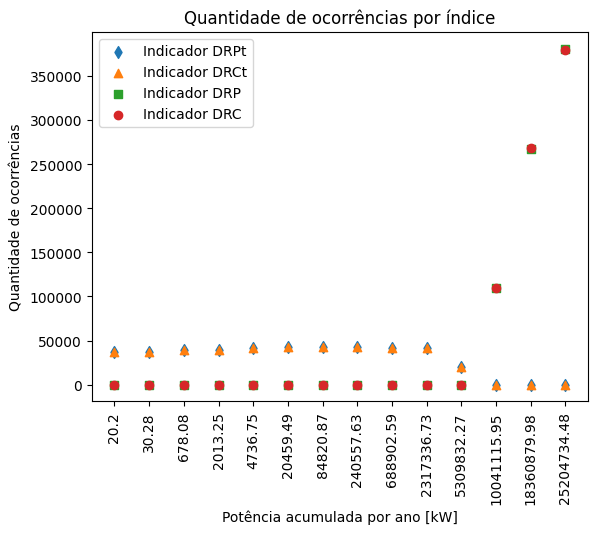

In [ ]:
  plt.figure(figsize = ((12, 6)))

  fig, ax = plt.subplots()
  ax.scatter(anos, toplot_quantidade_indicador_considerando_zeros_DRPt, label='Indicador DRPt',marker='d')
  ax.scatter(anos, toplot_quantidade_indicador_considerando_zeros_DRCt, label='Indicador DRCt',marker='^')
  ax.scatter(anos, toplot_quantidade_indicador_considerando_zeros_DRP, label='Indicador DRP',marker='s')
  ax.scatter(anos, toplot_quantidade_indicador_considerando_zeros_DRC, label='Indicador DRC')
  ax.legend()
  ax.set_xlabel('Potência acumulada por ano [kW]')
  ax.set_ylabel('Quantidade de ocorrências')
  ax.set_title('Quantidade de ocorrências por índice')
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.show()

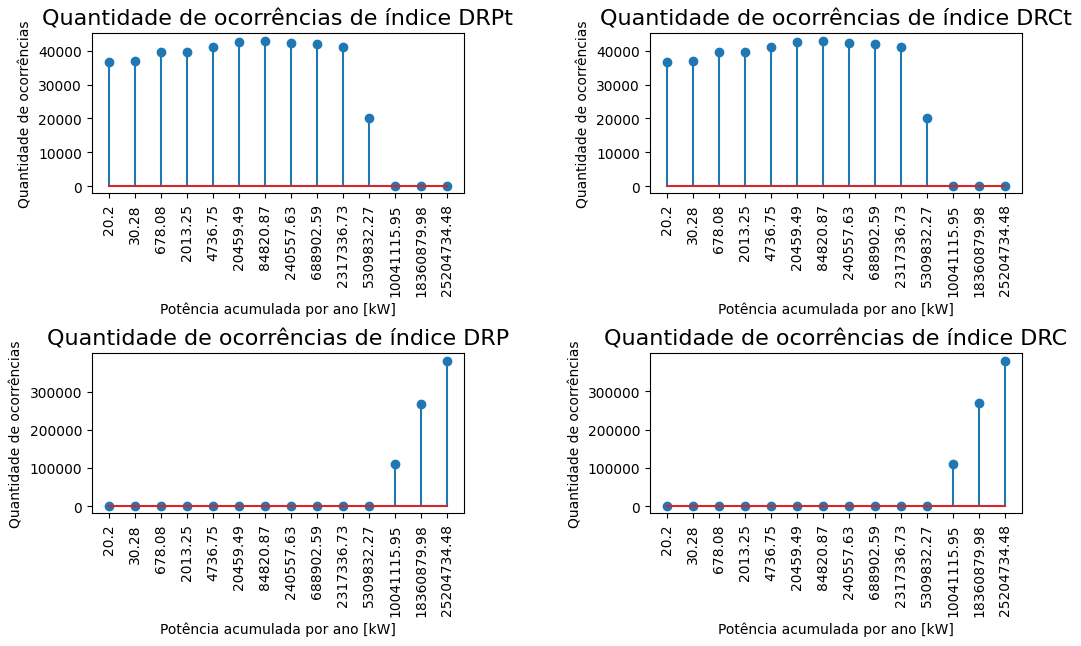

In [ ]:
  plt.figure(figsize = ((12, 6)))

  plt.subplot(2, 2, 1)
  plt.stem(anos, toplot_quantidade_indicador_considerando_zeros_DRPt)
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.xlabel("Potência acumulada por ano [kW]")
  plt.ylabel("Quantidade de ocorrências")
  plt.title("Quantidade de ocorrências de índice DRPt", fontsize = 16)

  plt.subplot(2, 2, 2)
  plt.stem(anos, toplot_quantidade_indicador_considerando_zeros_DRCt)
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.xlabel("Potência acumulada por ano [kW]")
  plt.ylabel("Quantidade de ocorrências")
  plt.title("Quantidade de ocorrências de índice DRCt", fontsize = 16)

  plt.subplot(2, 2, 3)
  plt.stem(anos, toplot_quantidade_indicador_considerando_zeros_DRP)
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.xlabel("Potência acumulada por ano [kW]")
  plt.ylabel("Quantidade de ocorrências")
  plt.title("Quantidade de ocorrências de índice DRP", fontsize = 16)

  plt.subplot(2, 2, 4)
  plt.stem(anos, toplot_quantidade_indicador_considerando_zeros_DRC)
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.xlabel("Potência acumulada por ano [kW]")
  plt.ylabel("Quantidade de ocorrências")
  plt.title("Quantidade de ocorrências de índice DRC", fontsize = 16)

  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=1)
  plt.show()

In [ ]:
# Tratamento considerando somente valores de ocorrência diferente de zero
quantidade_problemas_por_indicador_ano = indicadores_df[indicadores_df['VlrIndiceEnviado'] != 0].groupby(['SigIndicador', 'AnoIndice'], as_index=False).agg({'VlrIndiceEnviado': 'count'})

quantidade_indicador_DRPt_tratado = {} # Duração Relativa da Transgressão Máxima de Tensão Precária
quantidade_indicador_DRCt_tratado = {} # Duração Relativa da Transgressão Máxima de Tensão Crítica
quantidade_indicador_DRP_tratado = {} # Duração Relativa da Transgressão Máxima de Tensão Precária Mensal
quantidade_indicador_DRC_tratado = {} # Duração Relativa da Transgressão Máxima de Tensão Crítica Mensal

for index, row in quantidade_problemas_por_indicador_ano.iterrows():
  for ano in anos:
    if row.SigIndicador == 'DRPt':
      if (ano == row.AnoIndice):
        quantidade_indicador_DRPt_tratado[row.AnoIndice] = row.VlrIndiceEnviado
    elif row.SigIndicador == 'DRCt':
      if (ano == row.AnoIndice):
        quantidade_indicador_DRCt_tratado[row.AnoIndice] = row.VlrIndiceEnviado
    elif row.SigIndicador == 'DRP':
      if (ano == row.AnoIndice):
        quantidade_indicador_DRP_tratado[row.AnoIndice] = row.VlrIndiceEnviado
    elif row.SigIndicador == 'DRC':
      if (ano == row.AnoIndice):
        quantidade_indicador_DRC_tratado[row.AnoIndice] = row.VlrIndiceEnviado

toplot_quantidade_indicador_DRPt = []
toplot_quantidade_indicador_DRCt = []
toplot_quantidade_indicador_DRP = []
toplot_quantidade_indicador_DRC = []

for ano in anos:
  valor_DRPt = lambda chave_ano: quantidade_indicador_DRPt_tratado[chave_ano] if chave_ano in quantidade_indicador_DRPt_tratado else 0
  toplot_quantidade_indicador_DRPt.append(valor_DRPt(ano))

for ano in anos:
  valor_DRCt = lambda chave_ano: quantidade_indicador_DRCt_tratado[chave_ano] if chave_ano in quantidade_indicador_DRCt_tratado else 0
  toplot_quantidade_indicador_DRCt.append(valor_DRCt(ano))

for ano in anos:
  valor_DRP = lambda chave_ano: quantidade_indicador_DRP_tratado[chave_ano] if chave_ano in quantidade_indicador_DRP_tratado else 0
  toplot_quantidade_indicador_DRP.append(valor_DRP(ano))

for ano in anos:
  valor_DRC = lambda chave_ano: quantidade_indicador_DRC_tratado[chave_ano] if chave_ano in quantidade_indicador_DRC_tratado else 0
  toplot_quantidade_indicador_DRC.append(valor_DRC(ano))

<Figure size 1200x600 with 0 Axes>

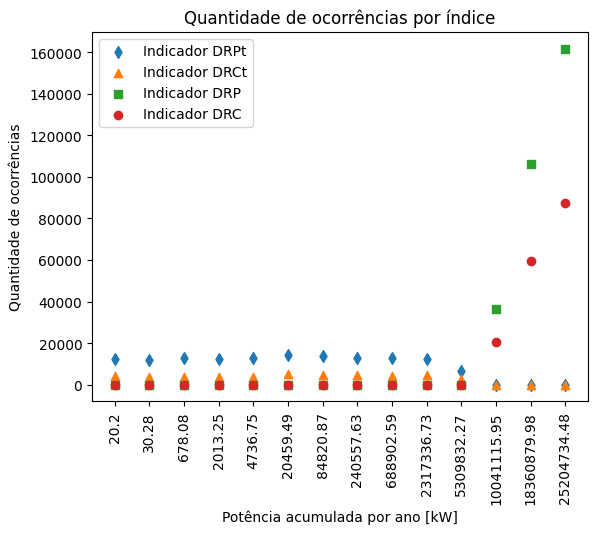

In [ ]:
  plt.figure(figsize = ((12, 6)))

  fig, ax = plt.subplots()
  ax.scatter(anos, toplot_quantidade_indicador_DRPt, label='Indicador DRPt',marker='d')
  ax.scatter(anos, toplot_quantidade_indicador_DRCt, label='Indicador DRCt',marker='^')
  ax.scatter(anos, toplot_quantidade_indicador_DRP, label='Indicador DRP',marker='s')
  ax.scatter(anos, toplot_quantidade_indicador_DRC, label='Indicador DRC')
  ax.legend()
  ax.set_xlabel('Potência acumulada por ano [kW]')
  ax.set_ylabel('Quantidade de ocorrências')
  ax.set_title('Quantidade de ocorrências por índice')
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.show()

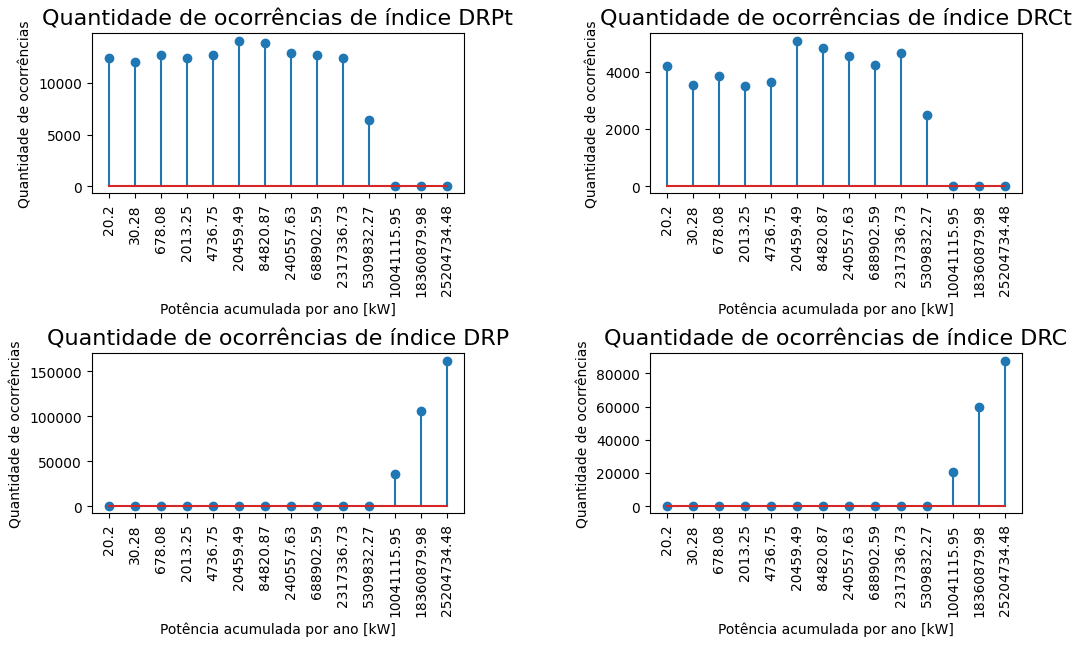

In [ ]:
  plt.figure(figsize = ((12, 6)))

  plt.subplot(2, 2, 1)
  plt.stem(anos, toplot_quantidade_indicador_DRPt)
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.xlabel("Potência acumulada por ano [kW]")
  plt.ylabel("Quantidade de ocorrências")
  plt.title("Quantidade de ocorrências de índice DRPt", fontsize = 16)

  plt.subplot(2, 2, 2)
  plt.stem(anos, toplot_quantidade_indicador_DRCt)
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.xlabel("Potência acumulada por ano [kW]")
  plt.ylabel("Quantidade de ocorrências")
  plt.title("Quantidade de ocorrências de índice DRCt", fontsize = 16)

  plt.subplot(2, 2, 3)
  plt.stem(anos, toplot_quantidade_indicador_DRP)
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.xlabel("Potência acumulada por ano [kW]")
  plt.ylabel("Quantidade de ocorrências")
  plt.title("Quantidade de ocorrências de índice DRP", fontsize = 16)

  plt.subplot(2, 2, 4)
  plt.stem(anos, toplot_quantidade_indicador_DRC)
  plt.xticks(np.arange(min(anos), max(anos) + 1, 1))
  ticks, labels = plt.xticks()
  plt.xticks(ticks, toplot_potencia_acumulada_por_ano, rotation = 'vertical')
  plt.xlabel("Potência acumulada por ano [kW]")
  plt.ylabel("Quantidade de ocorrências")
  plt.title("Quantidade de ocorrências de índice DRC", fontsize = 16)

  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=1)
  plt.show()

In [ ]:
# Distribuidora - Sigla
# ELEKTRO = ELEKTRO
# COPEL = COPEL-DIS
# CEMIG = CEMIG-D
sigla_agente_desejado = 'CEMIG-D'

empreendimentos_agente_df = (empreendimentos_df)[lambda x: x['SigAgente'] == sigla_agente_desejado]
indicadores_agente_df = (indicadores_df)[lambda x: x['SigAgente'] == sigla_agente_desejado]

,SigAgente,SigIndicador,AnoIndice,NumPeriodoIndice,VlrIndiceEnviado
16451,CEMIG-D,DRPt,2016,1,0.0
16452,CEMIG-D,DRPt,2016,1,0.0
16453,CEMIG-D,DRPt,2016,1,0.0
16454,CEMIG-D,DRPt,2016,1,0.0
16455,CEMIG-D,DRPt,2016,1,0.0
